In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.3, random_state=101)

In [5]:
data

(array([[ 1.62661778e+00,  3.98844999e+00],
        [-9.93893113e+00, -4.30304684e+00],
        [ 5.06516937e-04,  6.61795401e-01],
        [-1.46982357e+00,  3.34059588e+00],
        [-1.11289425e+01, -8.69236807e+00],
        [-6.74754632e-01,  1.55697237e+00],
        [ 5.01506101e+00,  7.10665600e+00],
        [-9.63269996e-01,  1.66919109e+00],
        [-1.07689658e+01, -8.55187907e+00],
        [ 5.73276456e-01,  4.26818064e-01],
        [ 2.15243051e+00,  6.48913657e+00],
        [ 1.17442589e+00,  9.98238279e-01],
        [ 1.16231972e+00,  2.36721865e-01],
        [ 4.92769599e+00,  7.64802484e+00],
        [ 4.41294665e+00,  7.58572171e+00],
        [ 1.15839567e+00,  1.84189193e+00],
        [-9.54660344e+00, -5.66143055e+00],
        [ 1.57786816e+00, -1.37022424e+00],
        [-1.29886084e+01, -4.59023613e+00],
        [-8.98391453e+00, -6.31440896e+00],
        [ 4.42417225e+00,  6.43027276e+00],
        [-8.38774729e+00, -8.73736469e+00],
        [-8.42695442e+00, -6.187

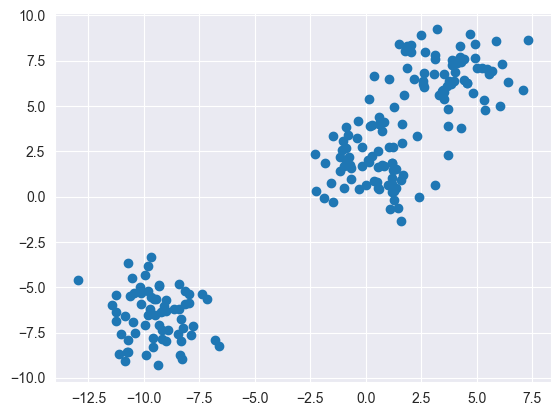

In [6]:
plt.scatter(data[0][:, 0], data[0][:, 1])

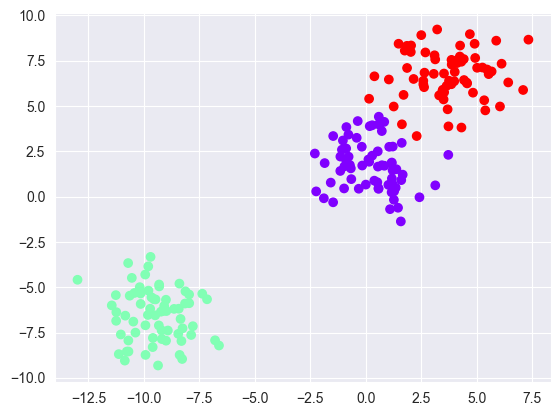

In [7]:
plt.scatter(x = data[0][:, 0], y = data[0][:, 1],c=data[1], cmap='rainbow')

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters= 5, n_init= 7) #The n_init parameter controls the number of time the k-means algorithm will be run with different centroid seeds

In [10]:
model.fit(data[0])

KMeans(n_clusters=5, n_init=7)

In [11]:
model.cluster_centers_

array([[ 0.19991866,  1.09039009],
       [-9.6359601 , -5.54782373],
       [ 3.99533223,  6.92032276],
       [ 0.71031256,  3.95596996],
       [-9.21098657, -7.96480297]])

In [12]:
model.labels_

array([3, 1, 0, 3, 4, 0, 2, 0, 4, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 4,
       1, 2, 1, 0, 0, 1, 1, 2, 3, 0, 3, 1, 1, 2, 2, 2, 4, 2, 4, 1, 0, 4,
       2, 0, 0, 2, 0, 2, 1, 0, 1, 2, 3, 0, 2, 2, 3, 1, 4, 1, 4, 4, 0, 4,
       2, 4, 1, 1, 3, 1, 3, 0, 2, 1, 2, 3, 0, 0, 4, 1, 4, 0, 0, 3, 4, 0,
       0, 0, 1, 2, 3, 1, 2, 2, 2, 2, 3, 0, 0, 3, 2, 0, 4, 2, 1, 1, 3, 2,
       2, 1, 4, 2, 2, 2, 2, 0, 2, 3, 1, 3, 1, 2, 3, 0, 3, 2, 2, 2, 0, 1,
       4, 2, 4, 2, 1, 3, 1, 1, 1, 2, 2, 4, 3, 3, 2, 2, 2, 2, 0, 3, 0, 2,
       1, 4, 1, 3, 4, 0, 0, 3, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 4, 2,
       4, 1, 2, 0, 0, 3, 0, 4, 3, 4, 1, 0, 4, 1, 2, 2, 4, 0, 1, 1, 1, 0,
       0, 0], dtype=int32)

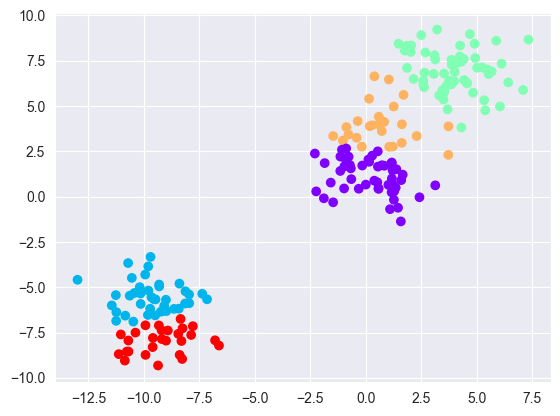

In [13]:
plt.scatter(data[0][:, 0], data[0][:, 1], c = model.labels_, cmap='rainbow')

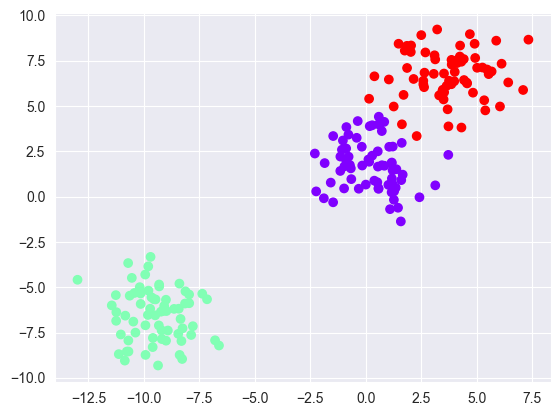

In [14]:

plt.scatter(x = data[0][:, 0], y = data[0][:, 1],c=data[1], cmap='rainbow')

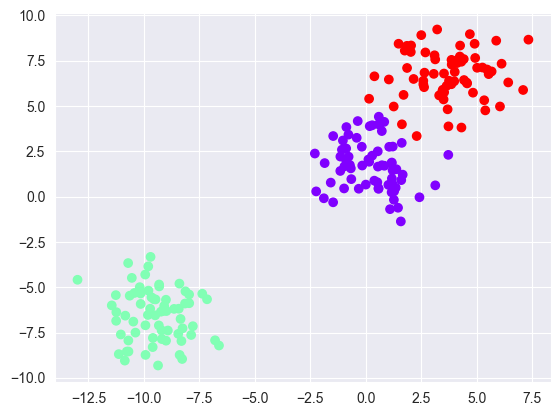

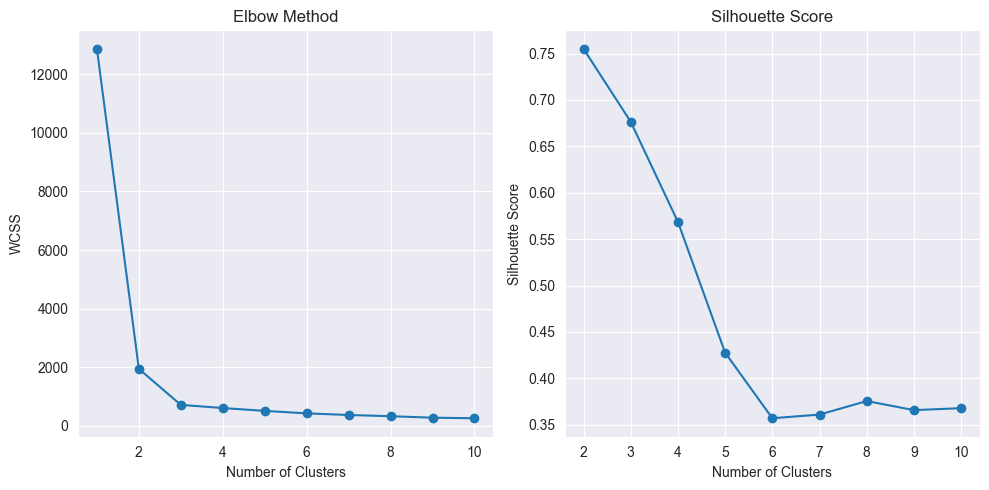

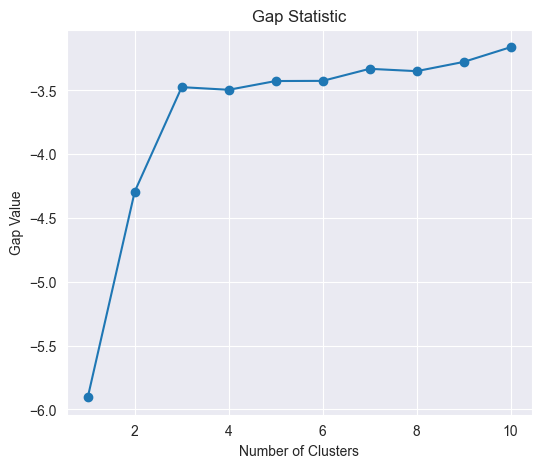

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate data
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.3, random_state=101)

# Scatter plot of the data points
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=7)
    kmeans.fit(data[0])
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=7)
    kmeans.fit(data[0])
    silhouette_scores.append(silhouette_score(data[0], kmeans.labels_))

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Gap Statistic
def compute_gap(data, k):
    kmeans = KMeans(n_clusters=k, n_init=7)
    kmeans.fit(data)
    reference_data = np.random.rand(data.shape[0], data.shape[1])
    reference_wcss = []
    for i in range(1, k + 1):
        kmeans_ref = KMeans(n_clusters=i, n_init=7)
        kmeans_ref.fit(reference_data)
        reference_wcss.append(kmeans_ref.inertia_)
    gap = np.log(np.mean(reference_wcss)) - np.log(kmeans.inertia_)
    return gap

gap_values = []
for i in range(1, 11):
    gap_values.append(compute_gap(data[0], i))

# Plot Gap Statistic
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), gap_values, marker='o')
plt.title('Gap Statistic')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.show()
